# Problem 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I defined the 51 points and the template Gaussian signal.

In [2]:
x=np.linspace(-5,5,51)
temp=np.exp(-(x**2)/2)

I defined the calculator routine to add a random Gaussian noise to the template Gaussian signal, so yn is the new signal that includes the noise. For this case the elements of the $N$ matrix would be $N_{ij}=\sigma^{2}$ for $i=j$ and $N_{in}=0$ for $i\neq j$, with $\sigma$ the standard deviation of yn. For simplicity $N^{-1}$ was defined just as a variable $N^{-1}=1/\sigma^{2}$, so the value of $A^{T}N^{-1}A$ is just the dot product $(e^{-x^2/2})^{T}(e^{-x^2/2})/\sigma^{2}$. This is named as denom in the routine.

If yn=$d$ then $A^{T}N^{-1}d$ becomes $\sum_{i}m_{i}d_{i}/\sigma^{2}$ with $m_{i}$ the template model for each data point. This term is num in the routine and it will be a num for each data point. Finally, the estimated source amplitude is returned as num/denom, the signal-to-noise ratio is num/sqrt(denom) because the error is 1/sqrt(denom).

In [3]:
def calculator(x):
    xn=x
    temp=np.exp(-(xn**2)/2)
    noise=np.random.randn(51)
    yn=noise+temp
    noisec=np.std(yn)
    Ninv=1.0/(noisec**2)
    dat_filt=Ninv*yn
    denom=np.dot(temp,Ninv*temp)
    amp=[]
    snr=[]
    for i in range(len(xn)):
        tempp=np.exp(-((xn-xn[i])**2)/2)
        num=np.dot(tempp,dat_filt)
        amp.append(num/denom)
        snr.append(num/np.sqrt(denom))
    return np.array(amp), np.array(snr),1/np.sqrt(denom)
        

Below I used the calculator 100 times, so I have 100 amplitudes, 100 snr, and 100 errors.

In [4]:
amp100=[]
snr100=[]
err100=[]
for i in range(100):
    amp,snr,err=calculator(x)
    amp100.append(amp)
    snr100.append(snr)
    err100.append(err)

In a plot for the amplitude for the first 20 models we can see that there is not a clear bias error on the signal.

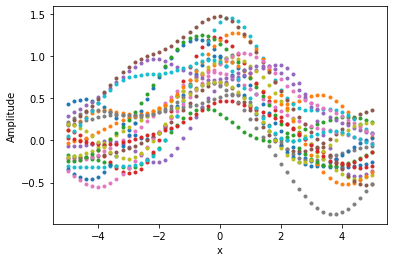

In [5]:
for i in range(20):
    plt.plot(x,amp100[i],'.')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.show()

Now, let's take the weighted amplitude at the element $x_{j}$ as $amp_{xj}=\sum_{i} amp_{ij}(err_{i}^{-2})/\sum_{i}(err_{i}^{-2})$, and the $i$ index goes from 1 to 100 since we used 100 models.

In [6]:
j100=[]
k100=[]
for i in range(len(amp100)):
    j100.append((amp100[i])*((err100[i])**-2))
    k100.append((err100[i])**-2)

In [7]:
l100=[]
for i in range(len(snr100)):
    l100.append((snr100[i])*((err100[i])**-2))

A comparison between the weighted amplitude and the template signal.

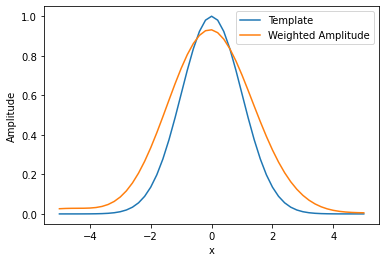

In [8]:
plt.plot(x,temp,label='Template')
plt.plot(x,sum(np.array(j100))/sum(k100),label='Weighted Amplitude')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

The absolute difference between the weighted amplitude and the template.

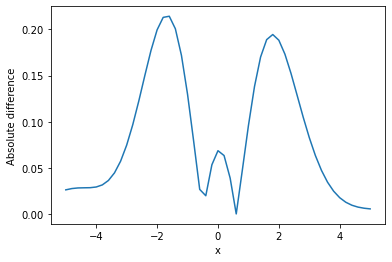

In [9]:
#plt.plot(x,temp)
plt.plot(x,np.abs(temp-sum(np.array(j100))/sum(k100)))
plt.xlabel('x')
plt.ylabel('Absolute difference')
plt.show()

It looks that the error is a bit biased but it could be just a uniform random difference if we stop analyzing here. I also add a SNR plot but does not give more information.

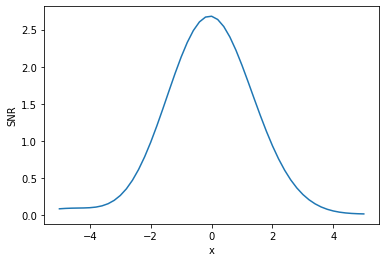

In [10]:
plt.plot(x,sum(np.array(l100))/sum(k100))
plt.xlabel('x')
plt.ylabel('SNR')
plt.show()

Let's try 10000 iterations

In [11]:
amp10000=[]
snr10000=[]
err10000=[]
for i in range(10000):
    amp,snr,err=calculator(x)
    amp10000.append(amp)
    snr10000.append(snr)
    err10000.append(err)

The amplitude for the first 30 models does not look biased too.

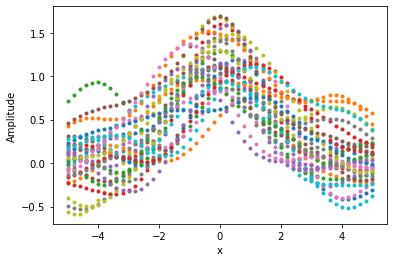

In [12]:
for i in range(30):
    plt.plot(x,amp10000[i],'.')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.show()

Let's obtain the weighted amplitude.

In [13]:
j10000=[]
k10000=[]
for i in range(len(amp10000)):
    j10000.append((amp10000[i])*((err10000[i])**-2))
    k10000.append((err10000[i])**-2)

In [14]:
l10000=[]
for i in range(len(snr10000)):
    l10000.append((snr10000[i])*((err10000[i])**-2))

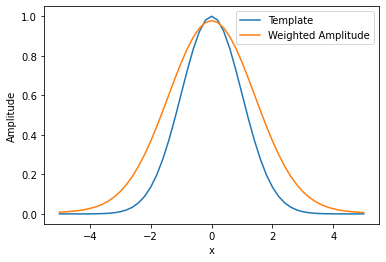

In [15]:
plt.plot(x,temp,label='Template')
plt.plot(x,sum(np.array(j10000))/sum(k10000),label='Weighted Amplitude')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

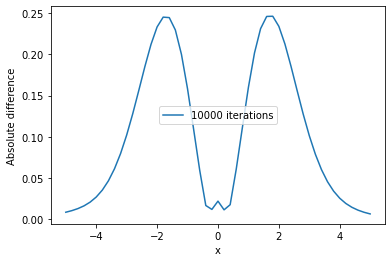

In [16]:
plt.plot(x,np.abs(temp-sum(np.array(j10000))/sum(k10000)),label='10000 iterations')
plt.xlabel('x')
plt.ylabel('Absolute difference')
plt.legend()
plt.show()

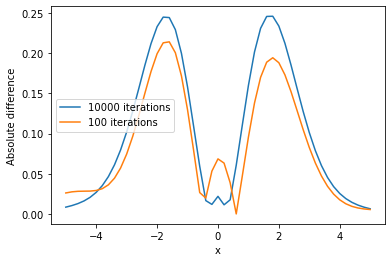

In [17]:
plt.plot(x,np.abs(temp-sum(np.array(j10000))/sum(k10000)),label='10000 iterations')
plt.plot(x,np.abs(temp-sum(np.array(j100))/sum(k100)),label='100 iterations')
plt.xlabel('x')
plt.ylabel('Absolute difference')
plt.legend()
plt.show()

Comparing the absolute differences for 10000 and 100 iterations, the 10000 iterations case looks more symmetrical with respect to x=0 and then is biased. Also the SNR is more symmetric.

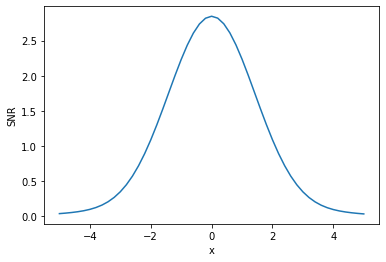

In [18]:
plt.plot(x,sum(np.array(l10000))/sum(k10000))
plt.xlabel('x')
plt.ylabel('SNR')
plt.show()